In [1]:
import os
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import utils
import consts
# Import statannot
from statannotations.Annotator import Annotator

reload(utils)
reload(consts)
PATH = os.getcwd()
DATA_PATH = os.path.join(PATH, 'data')

In [2]:
# Load mtCP data
diff_cells_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'chip_seq_diff_cell_lines_hypx_3.csv'))
diff_cells_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'chip_seq_diff_cell_lines_hypx_3.csv'))
# Combine
diff_cells_cp = diff_cells_cp.merge(diff_cells_cp_meta, left_on='sample', right_on='run_accession', how='left')
hela_chip_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'HeLa_chip.csv'))
hela_chip_cp_old = pd.read_csv(os.path.join(DATA_PATH, 'cp_data', 'HeLa_chip_cp.csv'))
hela_chip_cp_old['sample'] = hela_chip_cp_old['sample'].apply(lambda x: x.split('_')[0])

hela_chip_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'HeLa_chip.csv'))
# Combine
hela_chip_cp = hela_chip_cp.merge(hela_chip_cp_meta, left_on='sample',right_on='run_accession', how='left')
hela_chip_cp_old = hela_chip_cp_old.merge(hela_chip_cp_meta, left_on='sample',right_on='run_accession', how='left')
hela_atac_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'HeLa_hypx_atac.csv'))
hela_atac_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'HeLa_hypx_atac.csv'))
# Combine
hela_atac_cp = hela_atac_cp.merge(hela_atac_cp_meta, left_on='sample', right_on='run_accession', how='left')
mcf7_atac_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'MCF7_hypx_atac.csv'))
mcf7_atac_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'MCF7_hypx_atac.csv'))
# Combine
mcf7_atac_cp = mcf7_atac_cp.merge(mcf7_atac_cp_meta, left_on='sample',right_on='sample_accession', how='left')

mcf7_chip1_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'MCF7_hypx_chip1.csv'))
mcf7_chip1_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'MCF7_hypx_chip1.csv'))
# Combine
mcf7_chip1_cp = mcf7_chip1_cp.merge(mcf7_chip1_cp_meta, left_on='sample',right_on='sample_accession', how='left')
mcf7_chip2_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'MCF7_hypx_chip2.csv'))
mcf7_chip2_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'MCF7_hypx_chip2.csv'))
# Combine
mcf7_chip2_cp = mcf7_chip2_cp.merge(mcf7_chip2_cp_meta, left_on='sample',right_on='sample_accession', how='left')
mcf7_chip2_cp['time'] = mcf7_chip2_cp['time'].astype('str')

lncap_chip_cp = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'LNCaP_hypx_chip.csv'))
lncap_chip_cp_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'LNCaP_hypx_chip.csv'))
# Combine
lncap_chip_cp = lncap_chip_cp.merge(lncap_chip_cp_meta, left_on='sample',right_on='sample_accession', how='left')

# Load CHP134 ATAC-seq data
chp134_atac = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'CHP134_hypx_atac.csv'))
chp134_atac_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'CHP134_hypx_atac.csv'))
# Combine
chp134_atac = chp134_atac.merge(chp134_atac_meta, left_on='sample',right_on='sample_accession', how='left')

# Load SKOV3 ATAC-seq data
skov3_atac = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'SKOV3_hypx_atac.csv'))
skov3_atac_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'SKOV3_hypx_atac.csv'))
# Combine
skov3_atac = skov3_atac.merge(skov3_atac_meta, left_on='sample',right_on='sample_accession', how='left')

# Load TNBC_cells_hypx_atac
tnbc_atac = pd.read_csv(os.path.join(DATA_PATH, 'fastmito_cp_data', 'TNBC_cells_hypx_atac.csv'))
tnbc_atac_meta = pd.read_csv(os.path.join(DATA_PATH, 'metadata', 'TNBC_cells_hypx_atac.csv'))
# Combine
tnbc_atac = tnbc_atac.merge(tnbc_atac_meta, left_on='sample',right_on='sample_accession', how='left')



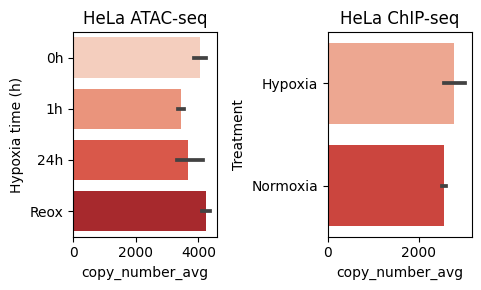

In [3]:
_, axes = plt.subplots(1, 2, figsize=(5, 3))
sns.barplot(y = 'hypx_time', x = 'copy_number_avg', data = hela_atac_cp.sort_values('hypx_time'), ax = axes[0], palette='Reds')
# Set title
axes[0].set_title('HeLa ATAC-seq')
axes[0].set_ylabel('Hypoxia time (h)')

sns.barplot(y = 'treatment', x = 'copy_number_avg', data = hela_chip_cp[hela_chip_cp.experiment == 'Input'].sort_values('treatment'), ax = axes[1], palette='Reds')
# Set title
axes[1].set_title('HeLa ChIP-seq')
axes[1].set_ylabel('Treatment')
plt.tight_layout()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1h vs. 0h: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=0.000e+00


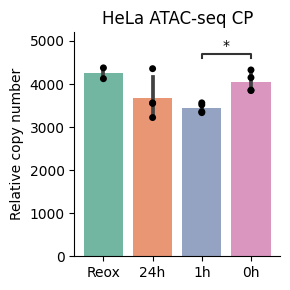

In [4]:
reload(utils)
utils.plot_mtcp(df = hela_atac_cp, x = 'hypx_time', y = 'copy_number_avg', savefig = 'hela_atac_cp', title = 'HeLa ATAC-seq CP', palette = 'Set2', hide_non_significant=True)

In [5]:
# Replace Hypoxia with 0.1% for 24h
mcf7_atac_cp['treatment'] = mcf7_atac_cp['treatment'].replace('Hypoxia', '0.1% 24h')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Normoxia vs. 0.1% 24h: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01


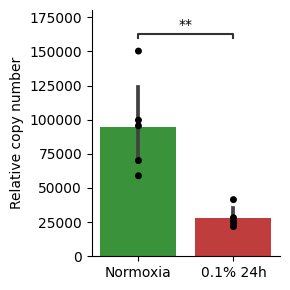

In [6]:
reload(utils)
utils.plot_mtcp(df = mcf7_atac_cp, x = 'treatment', y = 'copy_number_avg', savefig = 'mcf7_atac_cp', title = '')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Nor vs. Hyp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=4.000e+00


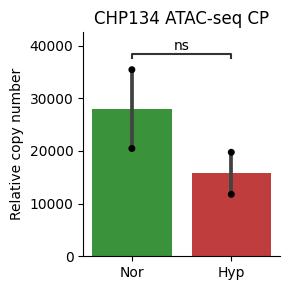

In [7]:
reload(utils)
chp134_atac = chp134_atac[chp134_atac['manipulation'] != 'Ac']
utils.plot_mtcp(df = chp134_atac, x = 'treatment', y = 'copy_number_avg', savefig = 'chp134_atac_cp', title = 'CHP134 ATAC-seq CP')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

normoxia, vs. hypoxia,: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=4.000e+00


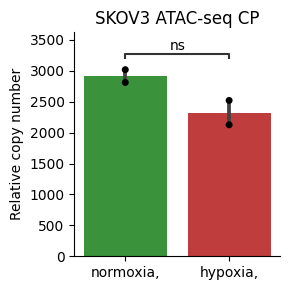

In [8]:
utils.plot_mtcp(df = skov3_atac, x = 'treatment', y = 'copy_number_avg', savefig = 'skov3_atac_cp', title = 'SKOV3 ATAC-seq CP')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Norm vs. Hypo: Mann-Whitney-Wilcoxon test two-sided, P_val:9.266e-01 U_stat=9.500e+01


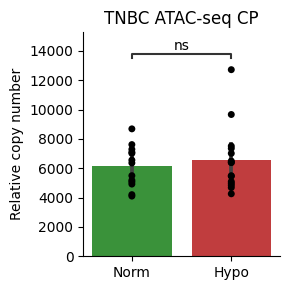

In [9]:
utils.plot_mtcp(df = tnbc_atac, x = 'treatment', y = 'copy_number_avg', savefig = 'skov3_atac_cp', title = 'TNBC ATAC-seq CP')

In [10]:
results_df = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined_results', 'combined_results_hindex.parquet.gzip'))
results_df_mito = results_df[results_df['Complex'].notna()]
results_df_mito = results_df_mito[results_df_mito['oxphos_coordination'] != 'Unassigned']
results_df_mito = results_df_mito[results_df_mito['padj'] < .05]
results_df_mito = results_df_mito.sort_values(by = ['oxphos_coordination', 'log2FoldChange'], ascending = True)
top_datasets = results_df_mito.groupby('cell_line').agg({'dataset' : 'first'}).dataset.tolist()



Mean up: 0.5+-0.52, mean down: 7.57+-2.14
Mean up: 0.57+-0.94, mean down: 11.64+-4.75
Mean up: 1.43+-1.22, mean down: 5.07+-2.16


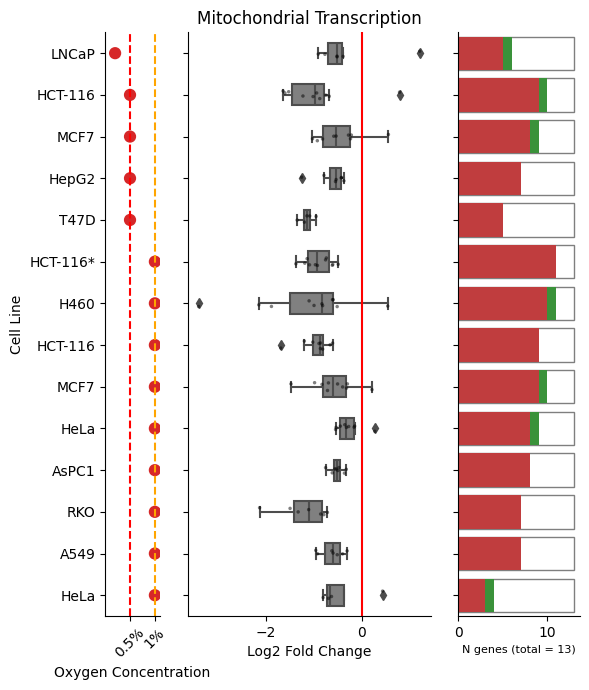

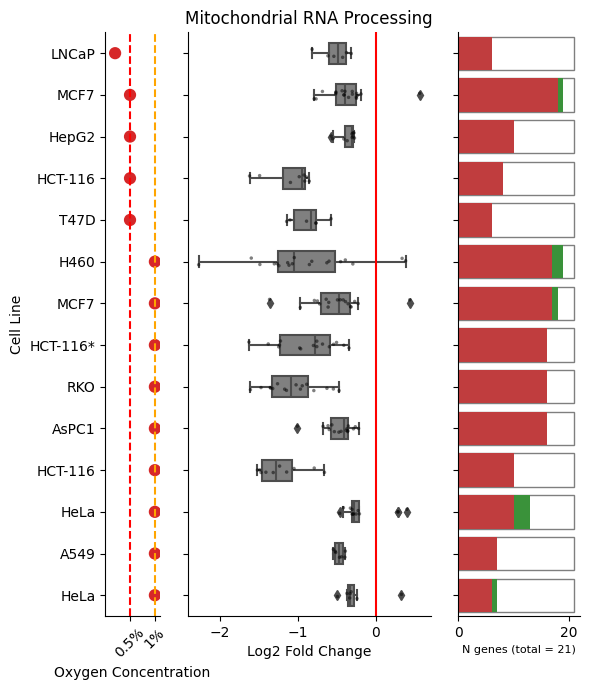

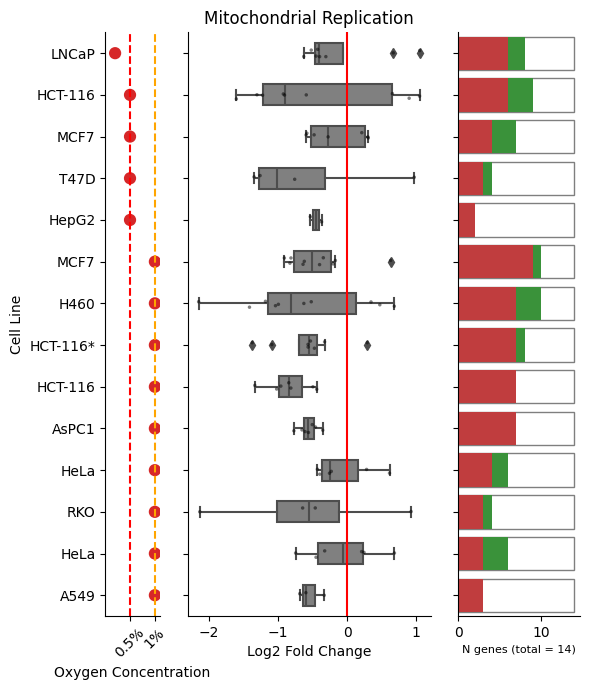

In [11]:
reload(utils)
results_df_sign = results_df[results_df['oxphos_coordination'] != 'Unassigned']

mito_trans_genes_df, mito_trans_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_TRANSCRIPTION.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
mito_trans_genes_mat, mito_trans_ngenes = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_TRANSCRIPTION.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

mito_rna_proc_genes_df, mito_rna_proc_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_RNA_PROCESSING.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
mito_rna_proc_genes_mat, mito_rna_proc_ngenes = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_RNA_PROCESSING.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

mito_rep_genes_df, mito_rep_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_REPLICATION.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
mito_rep_genes_mat, mito_rep_ngenes = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_REPLICATION.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

#mito_trans_genes_df = mito_trans_genes_df[mito_trans_genes_df.dataset.isin(top_datasets)]
#mito_trans_dataset_df = mito_trans_dataset_df[mito_trans_dataset_df.dataset.isin(top_datasets)]
#mito_rna_proc_genes_df = mito_rna_proc_genes_df[mito_rna_proc_genes_df.dataset.isin(top_datasets)]
#mito_rna_proc_dataset_df = mito_rna_proc_dataset_df[mito_rna_proc_dataset_df.dataset.isin(top_datasets)]
#mito_rep_genes_df = mito_rep_genes_df[mito_rep_genes_df.dataset.isin(top_datasets)]
#mito_rep_dataset_df = mito_rep_dataset_df[mito_rep_dataset_df.dataset.isin(top_datasets)]


xlab = 'Log2 Fold Change'
hue = False
sort_by = 'log2FoldChange'
palette = 'Reds'
ascending = False
legend = False
correlate = False
utils.plot_gene_set_per_dataset(mito_trans_genes_df, mito_trans_dataset_df, savefig = 'mito_trans_per_dataset', title = 'Mitochondrial Transcription', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,7), y = 'dataset')
utils.plot_gene_set_per_dataset(mito_rna_proc_genes_df, mito_rna_proc_dataset_df, savefig = 'mito_rna_proc_per_dataset', title = 'Mitochondrial RNA Processing', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,7), y = 'dataset')
utils.plot_gene_set_per_dataset(mito_rep_genes_df, mito_rep_dataset_df, savefig = 'mito_rep_per_dataset', title = 'Mitochondrial Replication', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,7), y = 'dataset')
# All 3 datasets together
mito_reg_genes_df = pd.concat([mito_trans_genes_df, mito_rna_proc_genes_df, mito_rep_genes_df])
# Combined all dataset dfs by summing the values of each column
mito_reg_dataset_df = pd.concat([mito_trans_dataset_df, mito_rna_proc_dataset_df, mito_rep_dataset_df]).groupby('dataset').agg({'up':'sum', 'down' : 'sum', 'total' : 'sum', 'dataset' : 'first', 'oxphos_coordination_value' : 'first', 'tfam_lfc' : 'first', 'up+down' : 'sum', 'max_pct' : 'first', 'cell_line' :'first'})




C:\Users\shtolz\AppData\Local\Temp\ipykernel_32356\314494766.py:2: DtypeWarning: Columns (16,17,18,19,20,25,26,33,37,41,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  hif1a_hct_df = pd.read_csv(os.path.join(PATH, 'data', 'all_hct_and_ko.csv'))
C:\Users\shtolz\AppData\Local\Temp\ipykernel_32356\314494766.py:4: DtypeWarning: Columns (16,17,18,19,20,25,26,33,37,41,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  hif1_mcf7_df = pd.read_csv(os.path.join(PATH, 'data', 'all_mcf7_and_ko.csv'))


Mean up: 0.75+-1.04, mean down: 8.0+-1.93
Mean up: 0.5+-0.53, mean down: 11.38+-4.78
Mean up: 1.25+-1.28, mean down: 6.25+-2.92
Mean up: 19.38+-3.62, mean down: 4.5+-2.56
Mean up: 4.12+-2.85, mean down: 10.38+-6.91


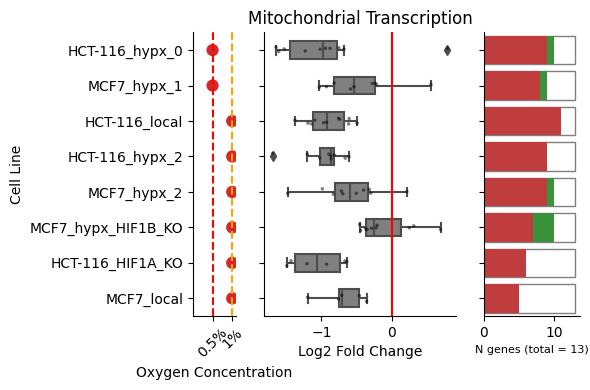

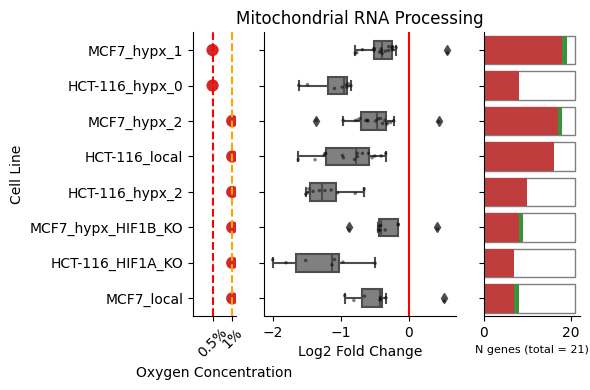

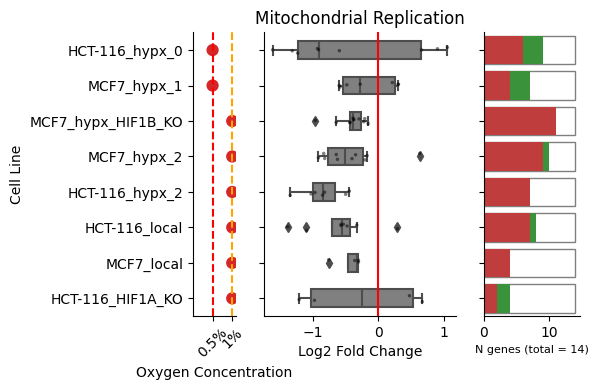

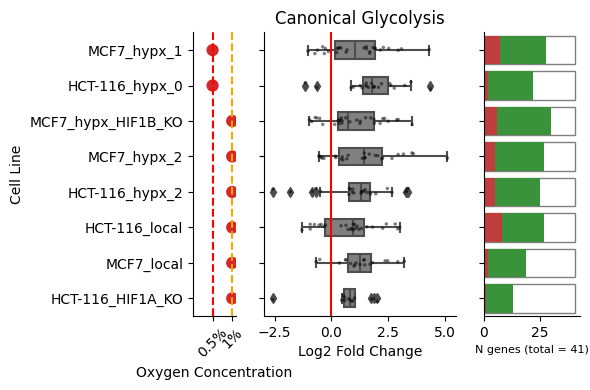

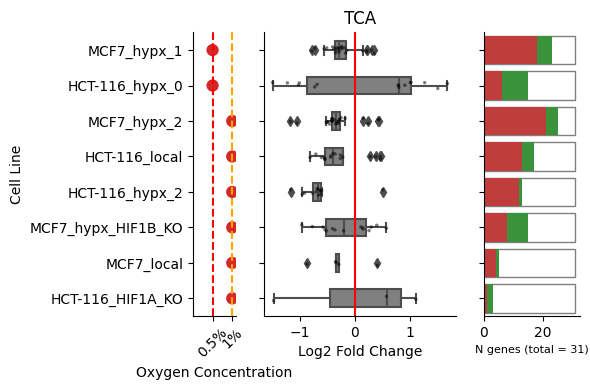

In [12]:
reload(utils)
hif1a_hct_df = pd.read_csv(os.path.join(PATH, 'data', 'all_hct_and_ko.csv'))
hif1a_hct_df = hif1a_hct_df.rename(columns = {'name' : 'gene'})
hif1_mcf7_df = pd.read_csv(os.path.join(PATH, 'data', 'all_mcf7_and_ko.csv'))
hif1_mcf7_df = hif1_mcf7_df.rename(columns = {'name' : 'gene'})
hif1_df = pd.concat([hif1a_hct_df, hif1_mcf7_df])

mito_trans_genes_df, mito_trans_dataset_df = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_TRANSCRIPTION.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
mito_trans_genes_mat, mito_trans_ngenes = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_TRANSCRIPTION.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

mito_rna_proc_genes_df, mito_rna_proc_dataset_df = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_RNA_PROCESSING.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
mito_rna_proc_genes_mat, mito_rna_proc_ngenes = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_RNA_PROCESSING.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

mito_rep_genes_df, mito_rep_dataset_df = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_REPLICATION.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
mito_rep_genes_mat, mito_rep_ngenes = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'MITOCHONDRIAL_REPLICATION.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

gly_genes_df, gly_dataset_df = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'CANONICAL_GLYCOLYSIS_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long')
gly_genes_mat, gly_ngenes = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'CANONICAL_GLYCOLYSIS_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='matrix')

tca_genes_df, tca_dataset_df = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'TCA_Go.txt'),mode = 'tsv', gene_col = 'OGDHL',return_format='long')
tca_genes_mat, tca_ngenes = utils.create_gene_set_matrix(hif1_df, os.path.join(PATH, 'data', 'genes', 'TCA_Go.txt'),mode = 'tsv', gene_col = 'OGDHL', return_format='matrix')

correlate = False
y = 'dataset'

utils.plot_gene_set_per_dataset(mito_trans_genes_df, mito_trans_dataset_df, savefig = 'hif1a_ko_mito_trans_per_dataset', title = 'Mitochondrial Transcription', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,4), y = 'dataset', relabel = False)
utils.plot_gene_set_per_dataset(mito_rna_proc_genes_df, mito_rna_proc_dataset_df, savefig = 'hif1a_ko_mito_rna_proc_per_dataset', title = 'Mitochondrial RNA Processing', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,4), y = 'dataset', relabel = False)
utils.plot_gene_set_per_dataset(mito_rep_genes_df, mito_rep_dataset_df, savefig = 'hif1a_ko_mito_rep_per_dataset', title = 'Mitochondrial Replication', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,4), y = 'dataset', relabel = False)
utils.plot_gene_set_per_dataset(gly_genes_df, gly_dataset_df, savefig = 'hif1a_ko_gly_per_dataset', title = 'Canonical Glycolysis', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,4), y = 'dataset', relabel = False)
utils.plot_gene_set_per_dataset(tca_genes_df, tca_dataset_df, savefig = 'hif1a_ko_tca_per_dataset', title = 'TCA', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, extra_x_cat = 'Oxygen Concentration', figsize = (6,4), y = 'dataset', relabel = False)
# All 3 datasets together
mito_reg_genes_df = pd.concat([mito_trans_genes_df, mito_rna_proc_genes_df, mito_rep_genes_df])
# Combined all dataset dfs by summing the values of each column
mito_reg_dataset_df = pd.concat([mito_trans_dataset_df, mito_rna_proc_dataset_df, mito_rep_dataset_df]).groupby('dataset').agg({'up':'sum', 'down' : 'sum', 'total' : 'sum', 'dataset' : 'first', 'oxphos_coordination_value' : 'first', 'tfam_lfc' : 'first', 'up+down' : 'sum', 'max_pct' : 'first', 'cell_line' :'first'})


Mean up: 0.83+-0.38, mean down: 8.54+-2.61


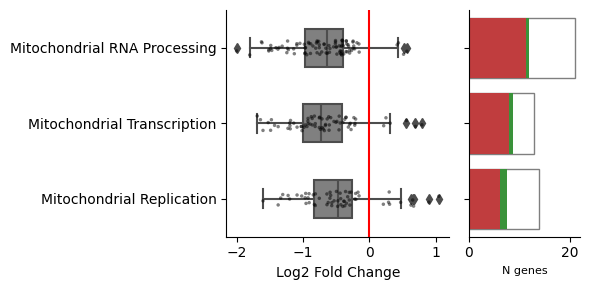

In [13]:
reload(utils)
mito_trans_dataset_df['Function'] = 'Mitochondrial Transcription'
mito_rna_proc_dataset_df['Function'] = 'Mitochondrial RNA Processing'
mito_rep_dataset_df['Function'] = 'Mitochondrial Replication'

mito_trans_genes_df['Function'] = 'Mitochondrial Transcription'
mito_rna_proc_genes_df['Function'] = 'Mitochondrial RNA Processing'
mito_rep_genes_df['Function'] = 'Mitochondrial Replication'

mito_reg_genes_df = pd.concat([mito_trans_genes_df, mito_rna_proc_genes_df, mito_rep_genes_df])
mito_reg_genes_df = mito_reg_genes_df.drop(columns = 'cell_line').rename(columns = {'Function' : 'cell_line'})
# Combined all dataset dfs by summing the values of each column
mito_reg_per_function_dataset_df = pd.concat([mito_trans_dataset_df, mito_rna_proc_dataset_df, mito_rep_dataset_df]).groupby('Function').agg({'up':'mean', 'down' : 'mean', 'total' : 'mean', 'oxphos_coordination_value' : 'mean', 'tfam_lfc' : 'mean', 'up+down' : 'mean', 'max_pct' : 'first'}).reset_index()
mito_reg_per_function_dataset_df = mito_reg_per_function_dataset_df.rename(columns = {'Function' : 'cell_line'})
mito_reg_per_function_dataset_df['total'] = mito_reg_per_function_dataset_df['total'].astype('int')


utils.plot_gene_set_per_dataset(mito_reg_genes_df, mito_reg_per_function_dataset_df, savefig = 'mito_reg_per_pathway', title = '', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, figsize = (6, 3), show_total=False)


In [14]:
mito_reg_per_function_dataset_df


,cell_line,up,down,total,oxphos_coordination_value,tfam_lfc,up+down,max_pct
0,Mitochondrial RNA Processing,0.50,11.375,21,0.152826,-0.609467,11.875,100
1,Mitochondrial Replication,1.25,6.250,14,0.152826,-0.609467,7.500,100
2,Mitochondrial Transcription,0.75,8.000,13,0.152826,-0.609467,8.750,100


Mean up: 2.5+-1.77, mean down: 25.62+-7.46


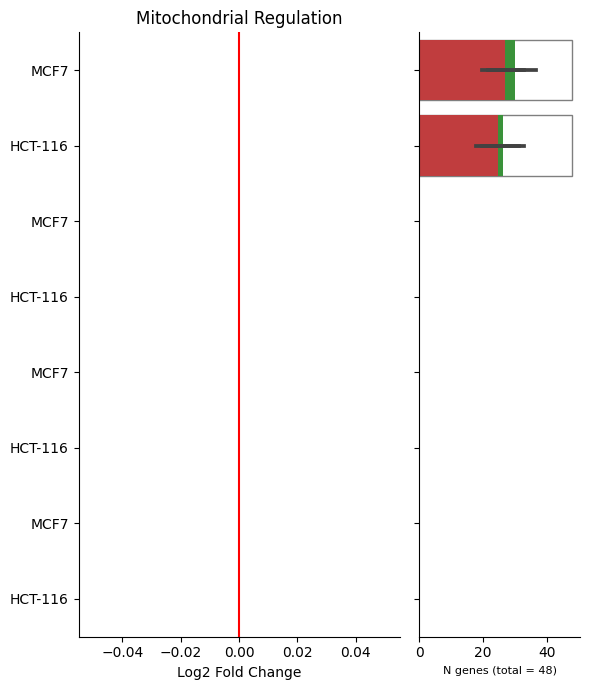

In [15]:
utils.plot_gene_set_per_dataset(mito_reg_genes_df, mito_reg_dataset_df, savefig = 'mito_reg_per_dataset', title = 'Mitochondrial Regulation', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend)

In [16]:

results_df['cell_type'] = results_df['dataset'].apply(lambda x: x.split('_')[0].split(' ')[0].upper())
results_df['Genome'] = results_df['Genome'].fillna('NUC')
results_annot = results_df.groupby('dataset').agg({'cell_type' : 'first'}).reset_index()

colors = dict(zip(results_annot['cell_type'].unique(), sns.color_palette('tab20', n_colors = len(results_annot['cell_type'].unique()))))
results_annot['Cell Type'] = results_annot['cell_type'].map(colors)
results_annot = results_annot.set_index('dataset')
display(results_annot.head(2))

gene_annot = results_df.groupby('gene').agg({'Genome' : 'first', 'Complex' : 'first', 'Description' : 'first'}).reset_index().set_index('gene')
# Add ap1 annotation
gene_annot['AP1'] = gene_annot.index.isin(consts.AP1)
genome_colors = {'NUC' : 'blue', 'MT' : 'red'}
gene_annot['Genome'] = gene_annot['Genome'].map(genome_colors)
gene_annot['Complex'] = gene_annot['Complex'].map({'I' : 'green', 'II' : 'orange', 'III' : 'purple', 'IV' : 'brown', 'V' : 'pink', 'Ribosome' : 'grey'})
gene_annot['AP1'] = gene_annot['AP1'].map({True : 'red', False : 'grey'})

reg_genes_annot = gene_annot.loc[[i.upper() for i in mito_rep_genes_mat.index if i in gene_annot.index],:]
display(gene_annot.head(2))

,cell_type,Cell Type
dataset,,
A549_hypx_0,A549,"(0.12156862745098039, 0.4666666666666667, 0.70..."
A549_hypx_1,A549,"(0.12156862745098039, 0.4666666666666667, 0.70..."


,Genome,Complex,Description,AP1
gene,,,,
5S_RRNA.1,blue,NaN,None,grey
5S_RRNA.15,blue,NaN,None,grey


C:\Users\shtolz\AppData\Local\Temp\ipykernel_32356\105814303.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


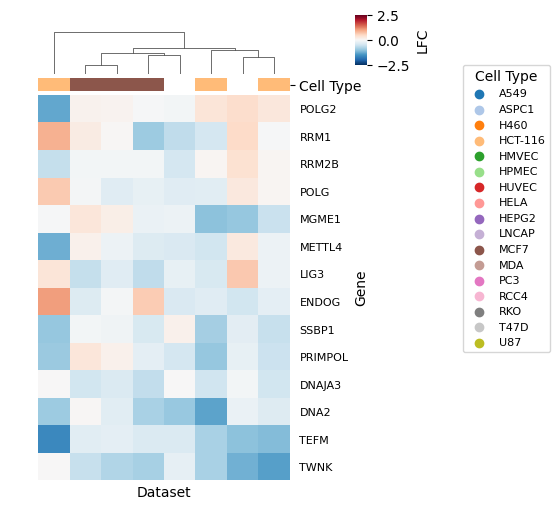

In [17]:
cm = sns.clustermap(mito_rep_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False, col_colors = results_annot[['Cell Type']], cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'mito_rna_proc_genes_clustermap.png'), dpi = 300, bbox_inches='tight')

In [18]:
# Check which OXPHOS genes change the most in MCF7 cells
mcf7_oxphos = results_df[(results_df['cell_type'] == 'MCF7') & (results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V']))].sort_values('log2FoldChange', ascending = True)
mcf7_oxphos = mcf7_oxphos[mcf7_oxphos['padj'] < 0.05]
mcf7_oxphos = mcf7_oxphos[mcf7_oxphos['Genome'] == 'NUC']
# Reindex
mcf7_oxphos = mcf7_oxphos.reset_index(drop = True)
GENES_WITH_PRIMERS = ['NDUFA12', 'NDUFAB1', 'SDHB', 'UQCRB', 'COX7B', 'ATP5J']

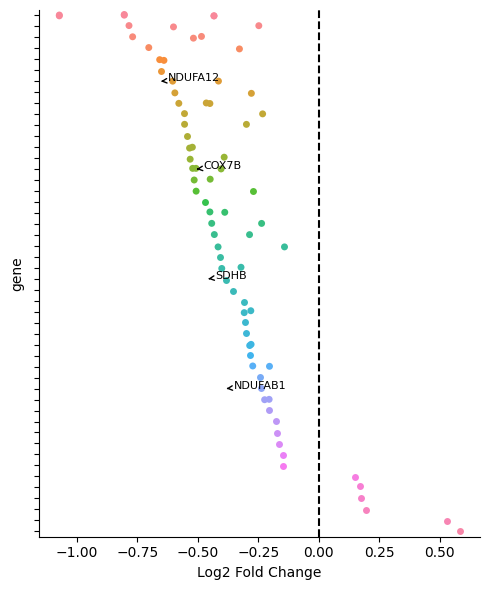

In [19]:
# Plot the log2fold change per gene
_, ax = plt.subplots(1, 1, figsize = (5, 6))
sns.stripplot(y = 'gene', x = 'log2FoldChange', data = mcf7_oxphos, ax = ax)
ax.set_xlabel('Log2 Fold Change')
# Remove yticklabels
ax.set_yticklabels([])
# Mark x=0
ax.axvline(0, color = 'black', linestyle = '--')
# Annotate genes with primers
for gene in GENES_WITH_PRIMERS:
     if gene in mcf7_oxphos['gene'].tolist():
          ax.annotate(gene, xy=(mcf7_oxphos[mcf7_oxphos['gene'] == gene].log2FoldChange.values[0] + .05, mcf7_oxphos[mcf7_oxphos['gene'] == gene].index[0]), xytext=(5, 0), textcoords='offset points', fontsize = 8, arrowprops=dict(facecolor='black', arrowstyle = '->'))
# Despine
sns.despine()
plt.tight_layout()